# Đề bài
![img for this exam](Debai.png)

In [1]:
import numpy as np # thư viện cho tính toán
import matplotlib.pyplot as plt # thư viện cho trực quan hóa đồ thị

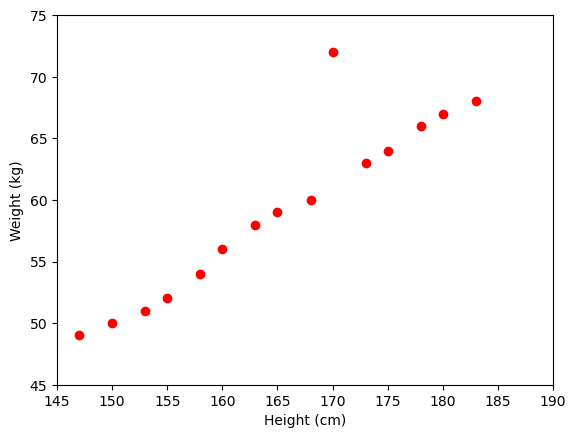

In [2]:
X = np.array([[147, 150, 153, 155, 158, 160, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[49, 50, 51, 52, 54, 56, 58, 59, 60, 72, 63, 64, 66, 67, 68]]).T
plt.plot(X, y, 'ro')
plt.axis([145, 190, 45, 75]) # cắt đến đoạn đồ thị có x từ 145 đến 190, y từ 45  đến 75
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show() # hiển thị đồ thị

Dữ liệu theo dạng đường thẳng, theo Linear Regression có thể thấy được `(cân nặng) = w_1*(chiều cao) + w_0` <br>
Ta có $\bar{X}$ là ma trận mà mỗi hàng của nó là 1 điểm dữ liệu <br>
Mà $\bar{x_i}$ = [1, ${x_{i1}}$, ${x_{i2}}$, ${x_{i3}}$] <br>
Nên $$\bar{X} = \begin{bmatrix}1 & x_{12} & x_{13} & ...\\
1 & x_{22} & x_{23} & ...\\
1 & x_{32} & x_{33} & ...
\end{bmatrix}$$

In [3]:
# Tạo ma trận Xbar
one = np.ones((X.shape[0], 1)) #X.shape trả về số chiều của X, dạng tuple, X.shape[0] là lấy số đầu tiên
# tương ứng là số phần tử của cột 0, Vì X là vector cột nên kích thước là số lượng phần tử
one # tạo ra n số 1 để thêm vào cột đầu của Xbar

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [4]:
Xbar = np.concatenate((one, X), axis = 1) # nối one vào X theo chiều Oy(axis=0 là Ox, axis=1 là Oy)
Xbar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 155.],
       [  1., 158.],
       [  1., 160.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

Sau khi đạo hàm, tìm điểm cực trị ta thấy hàm mất mát L nhỏ nhất khi w = $ (\bar{X}^T\bar{X})^
†\bar{X}^T.y$ <br>
Nếu đặt $\bar{X}\bar{X}^T = A$ thì $A^†$ chính là giả nghịch đảo của A dùng trong trường hợp tổng quát.<br>
Trong numpy, giả nghịch đảo là `np.linalg.pinv(A)` (linear algebra pseudo inverse)

In [5]:
A = np.dot(Xbar.T, Xbar) # tính toán A
A

array([[1.50000e+01, 2.47800e+03],
       [2.47800e+03, 4.11152e+05]])

In [6]:
b = np.dot(Xbar.T, y) # tính toán X_bar * y
b

array([[   889.],
       [147918.]])

In [7]:
w = np.dot(np.linalg.pinv(A), b)
w

array([[-38.31452456],
       [  0.59068518]])

In [8]:
w_0 = w[0][0]
w_1 = w[1][0] # vì w là ma trận cột

Sau khi tính được
$w = \begin{bmatrix}w_{0}\\
w_{1}\\
\end{bmatrix}$ ta tiến hành xây dựng đường thẳng (linear) có dạng `y = w_1 * x + w_0`

In [9]:
x0 = np.linspace(145, 185, 2) # tạo ra 2 số trong khoảng từ 145 đến 185
y0 = w_1 * x0 + w_0
x0

array([145., 185.])

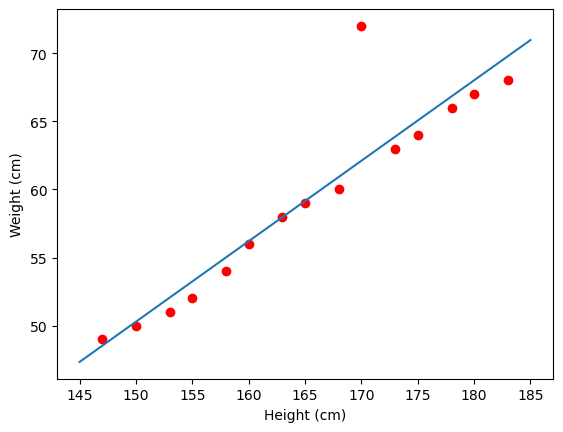

In [11]:
# in ra đường thẳng
plt.plot(X, y, 'ro') # data ban đầu
plt.plot(x0, y0)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (cm)')
plt.show()

In [16]:
# Tiến hành dự đoán cân nặng của người cao 155cm và 160cm
y1 = 155 * w_1 + w_0
y2 = 160 * w_1 + w_0
print('Người cao 155cm có cân nặng là khoảng:', {'%.2f' % y1})
print('Người cao 160cm có cân nặng là khoảng:', {'%.2f' % y2})

Người cao 155cm có cân nặng là khoảng: {'53.24'}
Người cao 160cm có cân nặng là khoảng: {'56.20'}


# Sử dụng thư viện có sẵn
`scikitlearn`

In [23]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(Xbar, y)
print('Các hệ số tính theo scikit-learn: w = ', regr.coef_)
print('Tính bằng tay ', w.T)

Các hệ số tính theo scikit-learn: w =  [[-38.31452456   0.59068518]]
Tính bằng tay  [[-38.31452456   0.59068518]]
